# 什么是机器学习？
## 我认为通俗的讲就是让计算机像人类一样通过'学习',来进行'思考'.
## 正式定义:对于一个计算机程序来说，给他一个任务T和一个性能测量方法P,如果在经验E的影响下，P对T的测量结果得到了改进，那么我们就说该程序从E中学习.

# 监督学习
## 去收集一组波士顿房屋的价格数据

In [467]:
import numpy as np
import matplotlib.pyplot as plt

columns = ('area(feet2)','price($)')
data = []
area, price = [], []
for sample in open("house_prices.csv", 'r'):
    _x, _y = sample.rstrip(' \n').split(",")
    # 将字符串数据转化为浮点数
    data.append((_x,_y))
    area.append(float(_x))
    price.append(float(_y))
n_rows = len(data)
rows = [i + 1 for i in range(n_rows) ]
data_with_title = data[:10]
data_with_title.insert(0,columns)
area, price = np.array(area), np.array(price)

### 下面简单的展示一下数据内容

In [468]:
from IPython.display import HTML, display
import tabulate
# 输出html表格
display(HTML(tabulate.tabulate(data_with_title, tablefmt='html')))

area(feet2),price($)
2104,399900
1600,329900
2400,369000
1416,232000
3000,539900
1985,299900
1534,314900
1427,198999
1380,212000
1494,242500


### 数据在二维平面坐标系呈现的样子

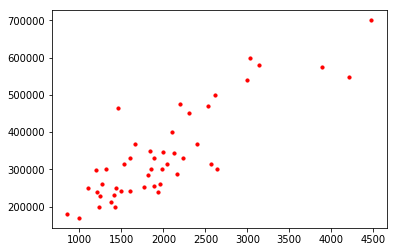

In [469]:
# 散点图
plt.figure()
plt.scatter(area, price, c="r", s=10)
plt.show()

### 数据反应了,房价与房屋面积所对应的情况

### 那么假设我现在想在波士顿地区 出售一套X平方英尺的房子 那么我应该卖多少钱？

### 从图形上看,这组数据呈直线趋势,那么我们是否可以在这些数据之间画一条直线

In [470]:
area_default = np.linspace(0,4500,1000)
def fit_model(area_default,area,price,deg):
    return np.polyval(np.polyfit(area, price ,deg), area_default)

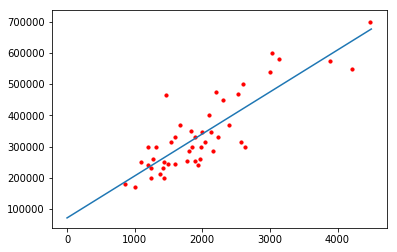

In [471]:
plt.figure()
plt.plot(area_default, fit_model(area_default,area,price,1))
plt.scatter(area, price, c="r", s=10)
plt.show()

### 也许可以用下面的曲线来拟合数据

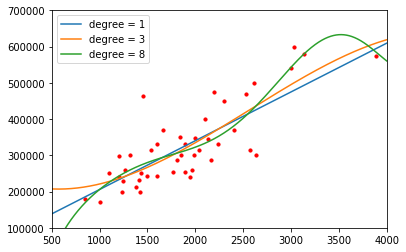

In [472]:
plt.figure()
degs = (1,3,8)
for deg in degs:
    plt.plot(area_default, fit_model(area_default,area,price,deg),label="degree = {}".format(deg))
plt.xlim(500, 4000)
plt.ylim(1e5, 7e5)
plt.legend()
plt.scatter(area, price, c="r", s=10)
plt.show()

### 这种问题就可以用监督学习来解决,因为我们已知了房屋价格的‘正确答案’

### 之所以叫监督学习,是因为我们在'监督'问题的算法(任务T)，换句话说我们给算法提供了一组标准答案(经验E),之后我们希望算法去学习标准输入和标准答案之间的联系,以尝试对于我们的其他输入给我们提供更为标准的答案

### 上面我们举的例子 属于回归的范畴 Regression

### 所以暗示着我们需要预测的答案是连续的

# 接下来我们要讲的是线性回归和梯度下降算法

### 继续上一节的房价问题的讨论

### 首先让我们引入一些数学符号

#### m = 训练样本数量

#### x = 输入变量/特征

#### y = 输出变量/目标变量

#### (x,y) = 一个训练样本

#### ($x^{(i)}$,$y^{(i)}$) = 第i个训练样本

#### ---------------------------------------

#### 由学习算法给出的输出函数

#### h = 输出函数 (假设)

#### 假设h将输入x映射到输出y

#### 那我们就对上述问题 做一个线性假设

#### h(x) = $θ_{0}$ + $θ_{1}$x

#### 很多情况下 我们不仅仅有一个输入特征 而是有很多特征

#### 为了让h的依赖显示的表示出来,有时我们会写

#### h(x) = $h_{θ}$(x) = $θ_{0}$ + $θ_{1}$x

#### 所以h(x) 就是我们对特征x预测的假设

#### 为了公式统一我们把 $x_{0}$ = 1 那么公式就可以写成

#### h(x) = $\begin{equation} \sum_{i=0}^{1} \end{equation}θ_{i}x_{i}$ = $θ^TX$

#### 如果 n = 特征数量 那么公式可以改写为 h(x) = $\begin{equation} \sum_{i=0}^{n} \end{equation}θ_{i}x_{i}$ = $θ^TX$

#### 这里面$θ^T$ 就是学习算法的参数,换句话说就是算法的模型,X 为特征向量

#### 现在问题转换为我们怎么样选取θ

#### 那么我们让 算法预测的价格与实际价格的 差的平方和 最小 选取那样的θ作为学习算法的参数

#### 这样的算法叫做最小二乘法

#### J(θ) = $\frac{1}{2} \begin{equation} \sum_{i=1}^{m} \end{equation}(h_{θ}(x^{(i)})-y^{(i)})^{2}$ 

#### $min_{θ} J(θ)$ 

#### 先使得θ = 0 然后让θ不断变化以减小J(θ)

#### 下面介绍这样的一个方法叫梯度下降法

#### θ := $θ_{i}$ - α$\frac{\partial}{\partialθ_{i}}J(θ)$

#### 其中α叫学习速度,求导后可得

#### $θ_{i}$ := $θ_{i}$ - α$\begin{equation}\sum_{j=1}^{m}\end{equation}(h_{θ}(x^{(j)})-y^{(j)})·x^{(j)}_{i}$

In [ ]:
def J_theta(train_set, theta):
    sum = 0
    for line in train_set:
        # print line
        sum += (np.dot(line[0:2], theta) - line[2])**2
    sum *= 0.5
    return sum


def reduce_theta(train_set, theta, alpha):
    theta_gradient_0 = 0
    theta_gradient_1 = 0
    for line in train_set:
        theta_gradient_0 += (np.dot(line[0:2], theta) - line[2]) * line[0]
        theta_gradient_1 += (np.dot(line[0:2], theta) - line[2]) * line[1]
    theta = theta - alpha * (np.array([theta_gradient_0, theta_gradient_1]))
    return theta

def h(theta,x):
    return np.array(list(map(lambda each:theta[0]+each*theta[1],x)))
    

In [474]:
theta = np.array([0, 0])
# alpha = 0.001
alpha = 0.000000002
data_add_zero = [[1.0,float(line[0]),float(line[1])] for line in data]
train_set = np.array(data_add_zero)

[1.31648491e-01 1.65383162e+02]


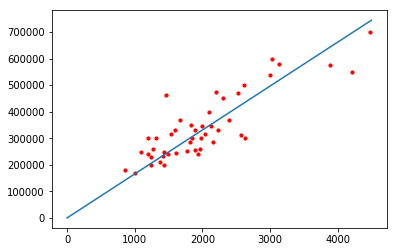

In [541]:
theta = reduce_theta(train_set, theta, alpha)
print(theta)

plt.figure()
plt.scatter(area, price, c="r", s=10)
plt.plot(area_default, h(theta,area_default))
plt.show()